# An Analysis on the Most Popular Steam Games
This Jupyter notebook contains the visualisations made in this project.

**Scenario:** This project considers a hypothetical game studio that wants to know what type of game they need to make, in order for it to have the highest chance of it succeeding.

## Notebook Structure
- [Identifying Features of Most Popular Games](#identifying-features-of-current-most-popular-games)
- [Determining Most Successful Payment Model](#pricing-model)
- [Historic Trends](#historic-trends)

## About This Notebooks
- Designed to be as dynamic as possible (visualisations will adapt automatically upon change of input)
- Designed to be interacted with
    - Controllable variables will have comments denoting their ability to be interactied with

### Notebook Setup

In [94]:
# Imports
import pandas as pd 
import numpy as np 
import matplotlib 
import matplotlib.pyplot as plt 

# Reading in Data
dataset = '912 Samples'
stats_file = 'Stats.csv'
details_file = 'Details.csv'
io_path_base = f'../Data Analysis- Are F2P Games the Solomn Future/Datasets/{dataset}/'

# Stats Datafile
df_stats = pd.read_csv(f'{io_path_base}{stats_file}')

# Details Datafile
df_details = pd.read_csv(f'{io_path_base}{details_file}')

### A Quick Look at the Data

In [95]:
df_details.head()

,Game Title,Price,Single Player,Online PvP,Online Co-Op,In-App Purchases,Tags
0,Counter-Strike 2,£0,False,True,False,True,"['Shooter', 'Multiplayer', 'Online Co-Op', 'Te..."
1,Dota 2,£0,False,True,False,True,"['Strategy', 'Co-op', 'Multiplayer', 'Free to ..."
2,Apex Legends,£0,False,True,True,True,"['Shooter', 'Multiplayer', 'Free to Play', 'Te..."
3,NARAKA: BLADEPOINT,£0,False,True,False,True,"['Female Protagonist', 'Survival', 'Massively ..."
4,Grand Theft Auto V,£29.98,True,True,True,False,"['Mature', 'Automobile Sim', 'Crime', 'Shooter..."


In [96]:
df_stats.head()

,Game Title,Rank,Date,Avg. Players,Peak Players
0,Counter-Strike 2,1,Last 30 Days,931542.77,1618685
1,Counter-Strike 2,1,April 2024,930748.98,1618685
2,Counter-Strike 2,1,March 2024,885629.69,1521796
3,Counter-Strike 2,1,February 2024,786630.82,1347519
4,Counter-Strike 2,1,January 2024,760859.23,1277907


## Identifying Features of Current Most Popular Games
The first step taken in identifying which type of game the game studio should look to me is by analysing the most common 'tags' of the most popular games, where game popularity is determined by current player count.

#### What are Tags?
'Tags' function as video game descriptors, providing details about the game. 
Some examples of tags are: *action*, *RPG*, and *multi-player*.

It's important to note that these tags are not standardised and can contain redundancies, with one game containing both 'Shooter' and 'FPS'.\
As such, some degree of qualitative analysis is needed to ensure the accuracy these results.

These visualisations will provide insight into what kind of game the developers should look to create when designing a 'successful' game. 


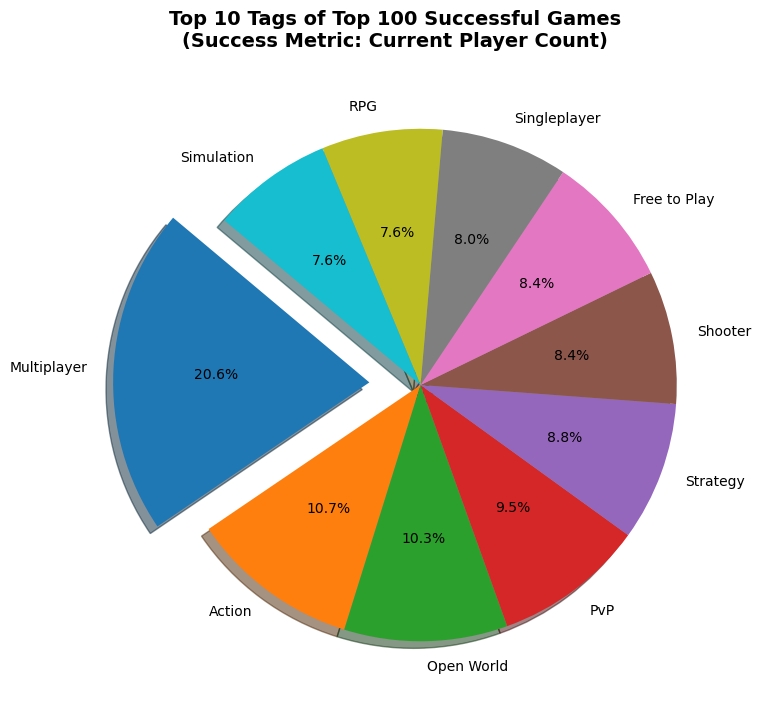

In [97]:
# Controllable Variables #
no_games = 100 # Upper limit of games to consider
no_tags = 10 # Number of tags to display in pie chart
wedgedistance = [0.2] # Wedge distance of most prevalent tag
# ---------------------------- #

# Isolate tags column
df_game_tags = df_details['Tags']

# Count the frequency of the tags
tag_frequency_dict = dict()
for rank in range(no_games):
        cur_tag_list = df_game_tags.iloc[rank].replace('[', '').replace(']','').replace('\'','').split(',')
        cur_tag_list = [x.strip() for x in cur_tag_list]

        for tag in cur_tag_list:
            
            # If tag already seen, update its counter
            if tag in tag_frequency_dict:
                tag_frequency_dict.update({tag:tag_frequency_dict.get(tag) + 1})
            else:
                 tag_frequency_dict.update({tag:1})
                  
# Order the dictionary by tag frequency
tag_frequency_dict = dict(sorted(tag_frequency_dict.items(), key=lambda item: item[1], reverse=True))

# Isolate keys and values
labels = list(tag_frequency_dict.keys())
values = list(tag_frequency_dict.values())

# Dynamic setting of explosion values
[wedgedistance.append(0) for x in range(1,no_tags)] 

# Pie plot
plt.figure(figsize=(8,8))
plt.pie(values[:no_tags], labels=labels[:no_tags], autopct='%1.1f%%', startangle=140, explode=wedgedistance, shadow = True)
plt.axis('equal')
plt.title(f'Top {no_tags} Tags of Top {no_games} Successful Games\n(Success Metric: Current Player Count)\n', 
          fontsize=14, 
          fontweight='bold')
plt.show()


### Chart Summary
The above pie chart clearly conveys that multi-player games are the most successful type of game (by a significant margin), and would be an ideal choice for the game studio.

The current visualisation does not show the relationship between the tags.
For example, 8% of the top 100 games have a single-player tag, but it is not shown what percentage of these games are exclusively single-player, and what percentage also have a multi-player mode.

This is explored in the subsequent figure.

#### Sample Data Bias
It is important to note that ranking games in such a manner, using their current player count as an indicator of success biases the data towards multi-player games due to their inability to be completed (unlike single-player games with a clear narrative ending), and extremely high levels of replay value.

However, with the publicly accessible data, using a game's player count is one of the best approaches when conducting a large scale analysis to determine the features of a successful game.

As a result of this bias and limitation of data availability, a second exploration into 'stability' is considered later in this notebook to help address this bias. 

### Most Successful Multi-Player Games 
The visualisation below tells us the most successful type of multi-player game, that is, the most common tags found in multi-player games.

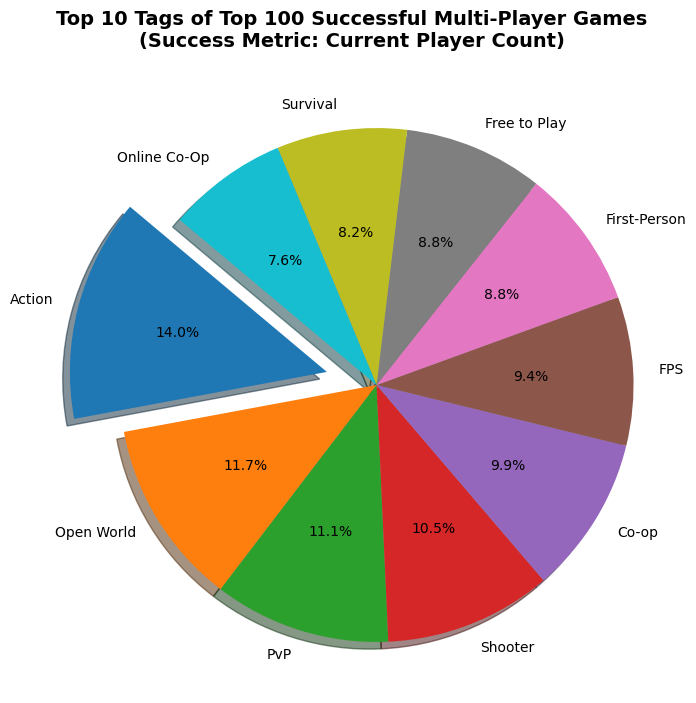

In [98]:
# Controllable Variables #
no_games = 100 # Upper limit of games to consider
no_tags = 10 # Number of tags to display in pie chart
wedgedistance = [0.2] # Wedge distance of most prevalent tag
# ---------------------------- #

# Isolate tags column
df_game_tags = df_details['Tags']

# Count the frequency of the tags
multiplayer_tag_frequency_dict = dict()
for rank in range(no_games):
        cur_tag_list = df_game_tags.iloc[rank].replace('[', '').replace(']','').replace('\'','').split(',')
        cur_tag_list = [x.strip() for x in cur_tag_list]

        # If the game is not multiplayer, skip it
        if 'Multiplayer' not in cur_tag_list:
             continue

        for tag in cur_tag_list:

            # We are not recording the multiplayer tag
            if 'multiplayer' in tag.lower():
                 continue
            
            # If tag already seen, update its counter
            if tag in multiplayer_tag_frequency_dict:
                multiplayer_tag_frequency_dict.update({tag:multiplayer_tag_frequency_dict.get(tag) + 1})
            else:
                 multiplayer_tag_frequency_dict.update({tag:1})
                  
# Order the dictionary by tag frequency
multiplayer_tag_frequency_dict = dict(sorted(multiplayer_tag_frequency_dict.items(), key=lambda item: item[1], reverse=True))

# Isolate keys and values
labels = list(multiplayer_tag_frequency_dict.keys())
values = list(multiplayer_tag_frequency_dict.values())

# Dynamic setting of explosion values
[wedgedistance.append(0) for x in range(1,no_tags)]

# Pie plot
plt.figure(figsize=(8,8))
plt.pie(values[:no_tags], 
        labels=labels[:no_tags],
        autopct='%1.1f%%',
        startangle=140,
        explode=wedgedistance,
        shadow = True,
        )
plt.axis('equal')
plt.title(f'Top {no_tags} Tags of Top {no_games} Successful Multi-Player Games\n(Success Metric: Current Player Count)\n', 
          fontsize=14,
          fontweight='bold')
plt.show()


### Chart Summary
The pie plot above conveys quite clearly that action-based games are the most successful, and is the recommended choice of game for the game studio.

As with the previous plot, the relationship and overlap between these tags is not shown.\
For example, 'Shooter' and 'FPS' (First-Person Shooter) are shown as two separate tags, yet significant overlap is expected between the two as FPS is a sub-category of shooter.

It is also expected that a significant number of games with the 'Action' tag will have signifiant overlap with the other tags in the pie chart (PvP, Shooter, and Survival).

More granular details can be provided on request.

## Pricing Model
With the knowledge of multi-player, action-based games being the most successful type of game for the game studio to create, the studio now needs to know which pricing model to choose.

Namely: *paid* or *free-to-play*.
<!-- 
    - General f2p vs paid 
    - Multiplayer 
-->

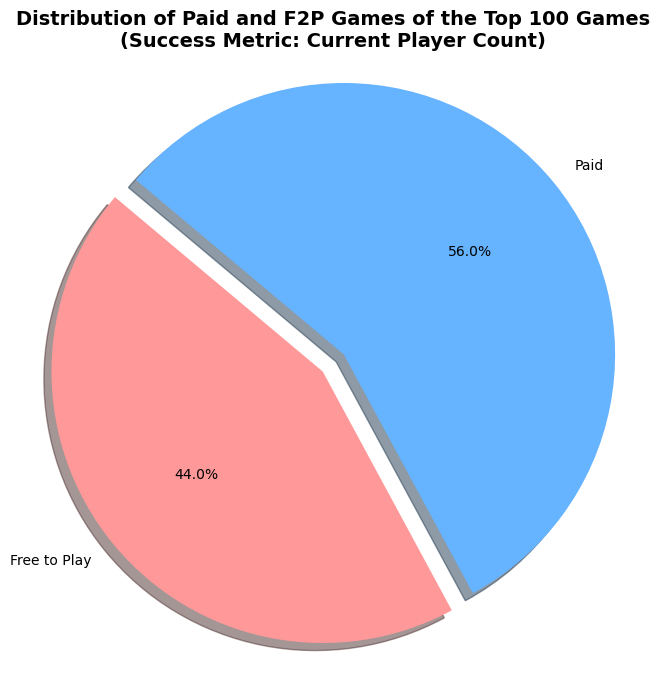

In [99]:
# Controllable Variables #
no_games = 100 # Upper limit of games to consider
# ---------------------------- #

# Isolate price column
df_game_prices = df_details['Price']

# Count number of games that are free
free_game_counter = 0
for rank in range(no_games):
    if df_game_prices.iloc[rank].strip() == '£0':
        free_game_counter += 1

# Define custom colors
colours = ['#ff9999', '#66b3ff']

# Pie plot 
plt.figure(figsize=(8,8))
explode = (0.1,0)
plt.pie([free_game_counter, (no_games - free_game_counter)], 
        labels=['Free to Play', 'Paid'],
        autopct='%1.1f%%',
        startangle=140,
        shadow=True,
        colors=colours,
        explode=explode)
plt.axis('equal')
plt.title(f'Distribution of Paid and F2P Games of the Top 100 Games\n(Success Metric: Current Player Count)',
          fontsize=14,
          fontweight='bold')
plt.show()

### Chart Summary
This visualisation shows games under the paid model being slightly more frequent than those under the free-to-play model.

When the data is looked at in much greater granularity, it can be seen that the top four games are those that use the free-to-play model.

To further assist the game studio regarding the pricing of their game, a scatter plot has been provided below, showing the relationship between price and popularity.

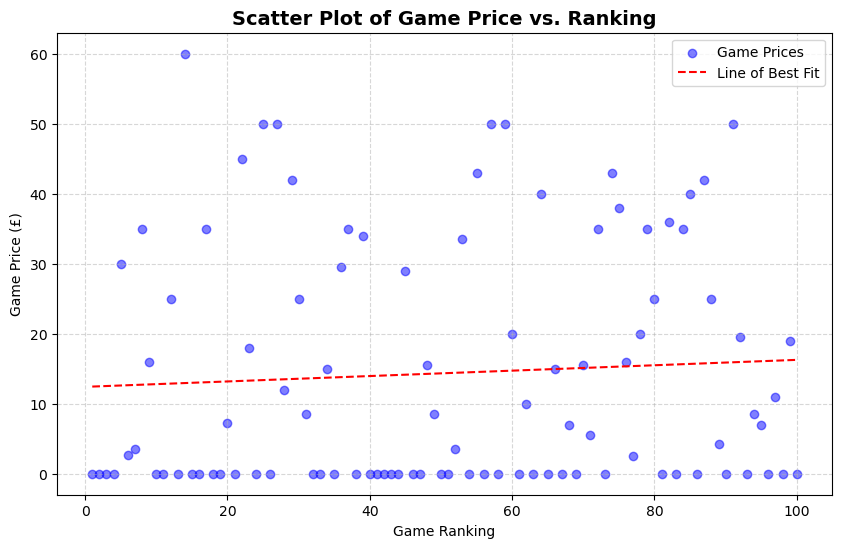

In [100]:
# Controllable Variables #
no_games = 100 # Upper limit of games to consider
# ---------------------------- #

# Isolate price column
df_game_prices = df_details['Price']

# Count number of games that are free
list_of_prices = []
list_of_ranks = [i for i in range(1,no_games + 1)]

for rank in range(no_games):
    price = df_game_prices.iloc[rank].strip().replace('£', '')
    list_of_prices.append(float(price))

# Plot scatter
plt.figure(figsize=(10,6))
plt.scatter(list_of_ranks, list_of_prices,
            marker='o', 
            color='blue',
            alpha=0.5,
            label='Game Prices')

# Plot details
plt.title('Scatter Plot of Game Price vs. Ranking', 
          fontsize=14, 
          fontweight='bold')
plt.xlabel('Game Ranking')
plt.ylabel('Game Price (£)')

# Plot grid
plt.grid(True, linestyle='--', alpha=0.5)

# Line of best fit
list_of_prices = np.array(list_of_prices)
list_of_ranks = np.array(list_of_ranks)
slope, intercept = np.polyfit(list_of_ranks, list_of_prices, 1)
line_of_best_fit = slope * list_of_ranks + intercept
plt.plot(list_of_ranks, line_of_best_fit,
         color='red',
         linestyle='--',
         label='Line of Best Fit')

# Add legend
plt.legend()

plt.show()

### Chart Summary 
This visualisation informs that there is a slight negative correlation between the popularity of a game and its price, implying lower priced games are more successful.

At this point in time, there does not appear to be much of a difference when we compare the free-to-play and paid models.

### Suggested Pricing 
A box plot has been provided to assist the game studio with the pricing of their game. 

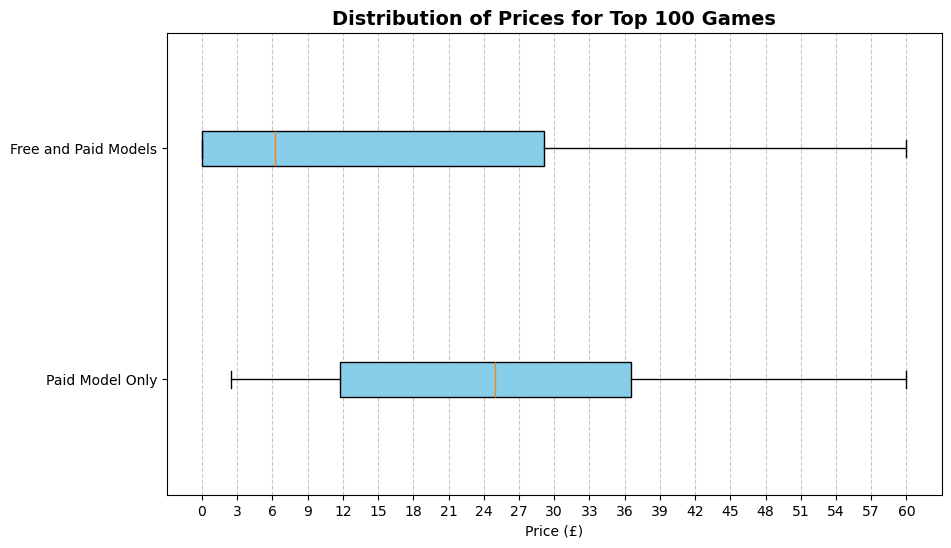

In [101]:
# Controllable Variables #
no_games = 100 # Upper limit of games to consider
# ---------------------------- #

# Isolate price column 
df_game_prices = df_details['Price']

# List of prices (paid only)
list_of_prices_paid_only = []
for rank in range(no_games):
    price = df_game_prices.iloc[rank].strip().replace('£', '')

    if price == '0':
        continue

    list_of_prices_paid_only.append(float(price))

# List of prices (including free)
list_of_prices_all = []
for rank in range(no_games):
    price = df_game_prices.iloc[rank].strip().replace('£', '')
    list_of_prices_all.append(float(price))

# Plot 
plt.figure(figsize=(10,6))
plt.boxplot([list_of_prices_paid_only, list_of_prices_all], 
                vert=False,
                patch_artist=True, #Enable boxplot colouring
                boxprops=dict(facecolor='skyblue'),
            )

plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.xlabel('Price (£)')
plt.yticks([1,2], ['Paid Model Only', 'Free and Paid Models'])
plt.xticks(np.arange(0, max(list_of_prices_paid_only) + 1, (max(list_of_prices_paid_only)/20)))

plt.title(f'Distribution of Prices for Top {no_games} Games',
          fontsize=14,
          fontweight='bold')
plt.show()


### Chart Summary 
This chart has generated to aid the game studio in pricing their game, based on the pricing of the top 100 games.
- There is a slight negative skew in price
- The majority of paid games are priced between appx. £11 and £37.

## Historic Trends
The visualisations above tell us that low-priced (averaging £8 or £23), multi-player action games are those which are most successful.

However, is there a historic precedent, or is the current state of successful games an outlier (and likely not to be long lasting)?

Let's take a look!
<!-- 
What percentage of the top avg. 100 games 

1. Line graph two lines (paid, free-to-play)
    - y-axis percentage 
    - x-axis (month, year)
    
2. Weighted bar plots (free-to-play and genre) [horizontal]
    - y-axis percentage 
    - x-axis (month, year)
    
    -->

### Free vs Paid

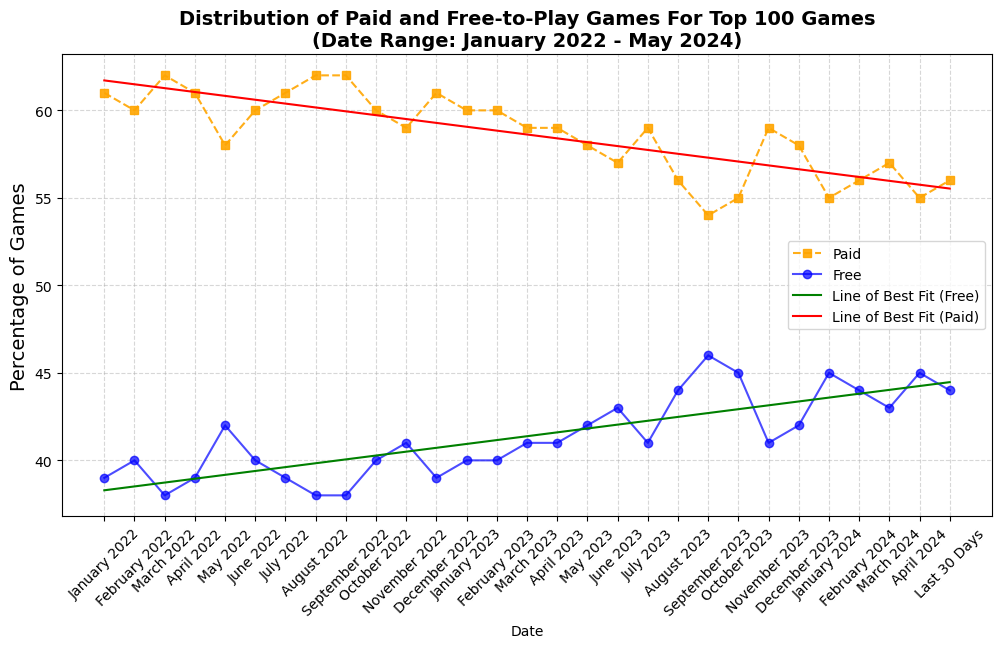

R^2 for the 'Paid' line of best fit: 0.6385746102449885
R^2 for the 'Free' line of best fit: 0.6385746102449894


In [102]:
# Controllable Variables #
no_games = 100 # Upper limit of games to consider
no_years = 2 # We are looking at the last x years of data
# ---------------------------- #

from datetime import datetime

# List of months
list_of_months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
current_month = list_of_months[datetime.now().month-1] # NOTE: If error, change to 'May'

# List of years
current_year = datetime.now().year
list_of_years = [str(current_year-x) for x in range(no_years, -1, -1)]
current_year = str(current_year)

# Plotting variables
list_of_dates = []
list_of_percentage_free = []
list_of_percentage_paid = []

# Get each game's avg player count for each date
break_loop = False
for year in list_of_years:
    for month in list_of_months:
        
        # Base Case - Current Year
        if year == current_year and month == current_month:
            current_date = 'Last 30 Days'
            break_loop = True
        else:
            current_date = f'{month} {year}'

        # Isolate ALL games for the given date
        temp_df = df_stats[df_stats['Date'] == current_date] # Get all games for current month
        temp_df = temp_df.sort_values(by='Avg. Players', ascending=False) # Order by avg players
        
        # Get price of top x games
        list_of_prices = []
        for rank in range(no_games):
            game_title = temp_df.iloc[rank]['Game Title']
            df_price= df_details[df_details['Game Title']== game_title]['Price']
            price = df_price.iloc[0].replace('£', '').strip()
            list_of_prices.append(float(price))
        
        # Calculate percentage of free vs paid in top x games
        count_free = sum(1 for x in list_of_prices if x == 0.0)

        # Store percentages in lists
        list_of_dates.append(current_date)
        list_of_percentage_free.append((count_free / len(list_of_prices)) * 100)
        list_of_percentage_paid.append(((len(list_of_prices)-count_free)/len(list_of_prices)) * 100)

        if break_loop is True:
            break

    if break_loop is True:
        break

# Plot figure
plt.figure(figsize=(12,6))
plt.plot(list_of_percentage_paid, label='Paid', marker='s', linestyle='--', color='orange', alpha=0.9)
plt.plot(list_of_percentage_free, label='Free', marker='o', linestyle='-', color='blue', alpha=0.7)

# Grid
plt.grid(True,
         alpha=0.5, 
         linestyle='--')

# Text details
plt.ylabel('Percentage of Games', fontsize=14)
plt.xlabel('Date')
plt.title(f'Distribution of Paid and Free-to-Play Games For Top 100 Games\n(Date Range: {list_of_dates[0]} - {current_month} {current_year})',
          fontsize=14,
          fontweight='bold')
plt.xticks(range(len(list_of_dates)), list_of_dates, rotation=45) 

# Calculate the line of best fit for the 'Paid' plot
slope_paid, intercept_paid = np.polyfit(range(len(list_of_percentage_paid)), list_of_percentage_paid, 1)
line_of_best_fit_paid = slope_paid * np.array(range(len(list_of_percentage_paid))) + intercept_paid
plt.plot(line_of_best_fit_free, label='Line of Best Fit (Free)', color='green', linestyle='-')

# Calculate the line of best fit for the 'Free' plot
slope_free, intercept_free = np.polyfit(range(len(list_of_percentage_free)), list_of_percentage_free, 1)
line_of_best_fit_free = slope_free * np.array(range(len(list_of_percentage_free))) + intercept_free
plt.plot(line_of_best_fit_paid, label='Line of Best Fit (Paid)', color='red', linestyle='-')
# plt.text(len(list_of_percentage_paid), line_of_best_fit_paid[-1], f'R^2 = {r2_paid:.2f}', ha='right', va='bottom', color='red')
# plt.text(len(list_of_percentage_free), line_of_best_fit_free[-1], f'R^2 = {r2_free:.2f}', ha='right', va='top', color='green')
plt.legend(frameon=True)

plt.show()

from sklearn.metrics import r2_score

# Calculate R^2 
r2_paid = r2_score(list_of_percentage_paid, line_of_best_fit_paid)
r2_free = r2_score(list_of_percentage_free, line_of_best_fit_free)

print("R^2 for the 'Paid' line of best fit:", r2_paid)
print("R^2 for the 'Free' line of best fit:", r2_free)


### Graph Summary 
The above visualisation confirms the stability (regarding paid games being the majority of the top games) over the last two years.\
For this graph, the average player count for each date is used to order the games.

**Note:**
There appears to be a gradual change in the trend of paid games comprising the majority of the top games, with the distance between the two distributions decreasing as time progresses.
Depending on the expected release date of the game, the payment model may be an insignificant factor to the game's success.

### Historic Trend (Genres)
Below, a visualisation is provided to show the distribution of multi-player games over the last 2 years.

#### Tag Overlap
- Mentioned earler, tags overlap (FPS, Shooter)
- This has been addressed slightly to increase the accuracy of findings

In [103]:
# Controllable Variables #
no_games = 100 # Upper limit of games to consider
no_years = 2 # We are looking at the last x years of data
# ---------------------------- #

from datetime import datetime

# List of months
list_of_months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
current_month = list_of_months[datetime.now().month-1]

# List of years
current_year = datetime.now().year
list_of_years = [str(current_year-x) for x in range(no_years, -1, -1)]
current_year = str(current_year)

# Plot variable
list_of_tag_frequency_per_date = [] #list of dictionaries
list_of_dates = []

break_loop = False
# Get distribution of multi-player genres for each date
for year in list_of_years:
    for month in list_of_months:

        # Base Case - Current Year
        if year == current_year and month == current_month:
            current_date = 'Last 30 Days'
            break_loop = True
        else:
            current_date = f'{month} {year}'

        # Isolate ALL games for the given date
        temp_df = df_stats[df_stats['Date'] == current_date] # Get all games for current month
        temp_df = temp_df.sort_values(by='Avg. Players', ascending=False) # Order by avg players

        # For each game, count tags
        tag_frequency_dict_per_date = dict()
        for rank in range(no_games):
            
            # Tags for each game
            cur_game_name = temp_df.iloc[rank]['Game Title']

            df_game_tags = df_details[df_details['Game Title'] == cur_game_name]['Tags']

            cur_tag_list = df_game_tags.iloc[0].replace('[', '').replace(']','').replace('\'','').split(',')
            cur_tag_list = [x.strip() for x in cur_tag_list]

            # If the game is not multiplayer, skip it
            if 'Multiplayer' not in cur_tag_list:
                continue

            # For each tag in the current game
            for tag in cur_tag_list:

                # Base Case - Don't count multiplayer tag
                if 'multiplayer' in tag.lower():
                    continue

                # Base Case - Don't count free-to-play tag
                if 'free to play' in tag.lower():
                    continue
                
                # If tag already seen, update its counter
                if tag in tag_frequency_dict_per_date:

                    match tag:
                        case 'Shooter' | 'FPS':
                            tag_frequency_dict_per_date.update({'Shooter': tag_frequency_dict_per_date.get('Shooter') + 1})
                        case 'Co-op' | 'Online Co-Op':
                            tag_frequency_dict_per_date.update({'Co-Op': tag_frequency_dict_per_date.get('Co-Op') + 1})
                        case _ :
                            tag_frequency_dict_per_date.update({tag:tag_frequency_dict_per_date.get(tag) + 1})

                else:

                    match tag:
                        case 'Shooter' | 'FPS':
                            tag_frequency_dict_per_date.update({'Shooter': 1})
                        case 'Co-op' | 'Online Co-Op':
                            tag_frequency_dict_per_date.update({'Co-Op': 1})
                        case _ :
                            tag_frequency_dict_per_date.update({tag: 1})
      
        # Order dictionary by tag frequency
        tag_frequency_dict_per_date = dict(sorted(tag_frequency_dict_per_date.items(), key=lambda item:item[1], reverse=True))

        # Update plotting variable
        list_of_tag_frequency_per_date.append(tag_frequency_dict_per_date)

        list_of_dates.append(current_date)
        # Base Case - Reached current date
        if break_loop is True:
            break

    # Base Case - Reached current date
    if break_loop is True:
        break


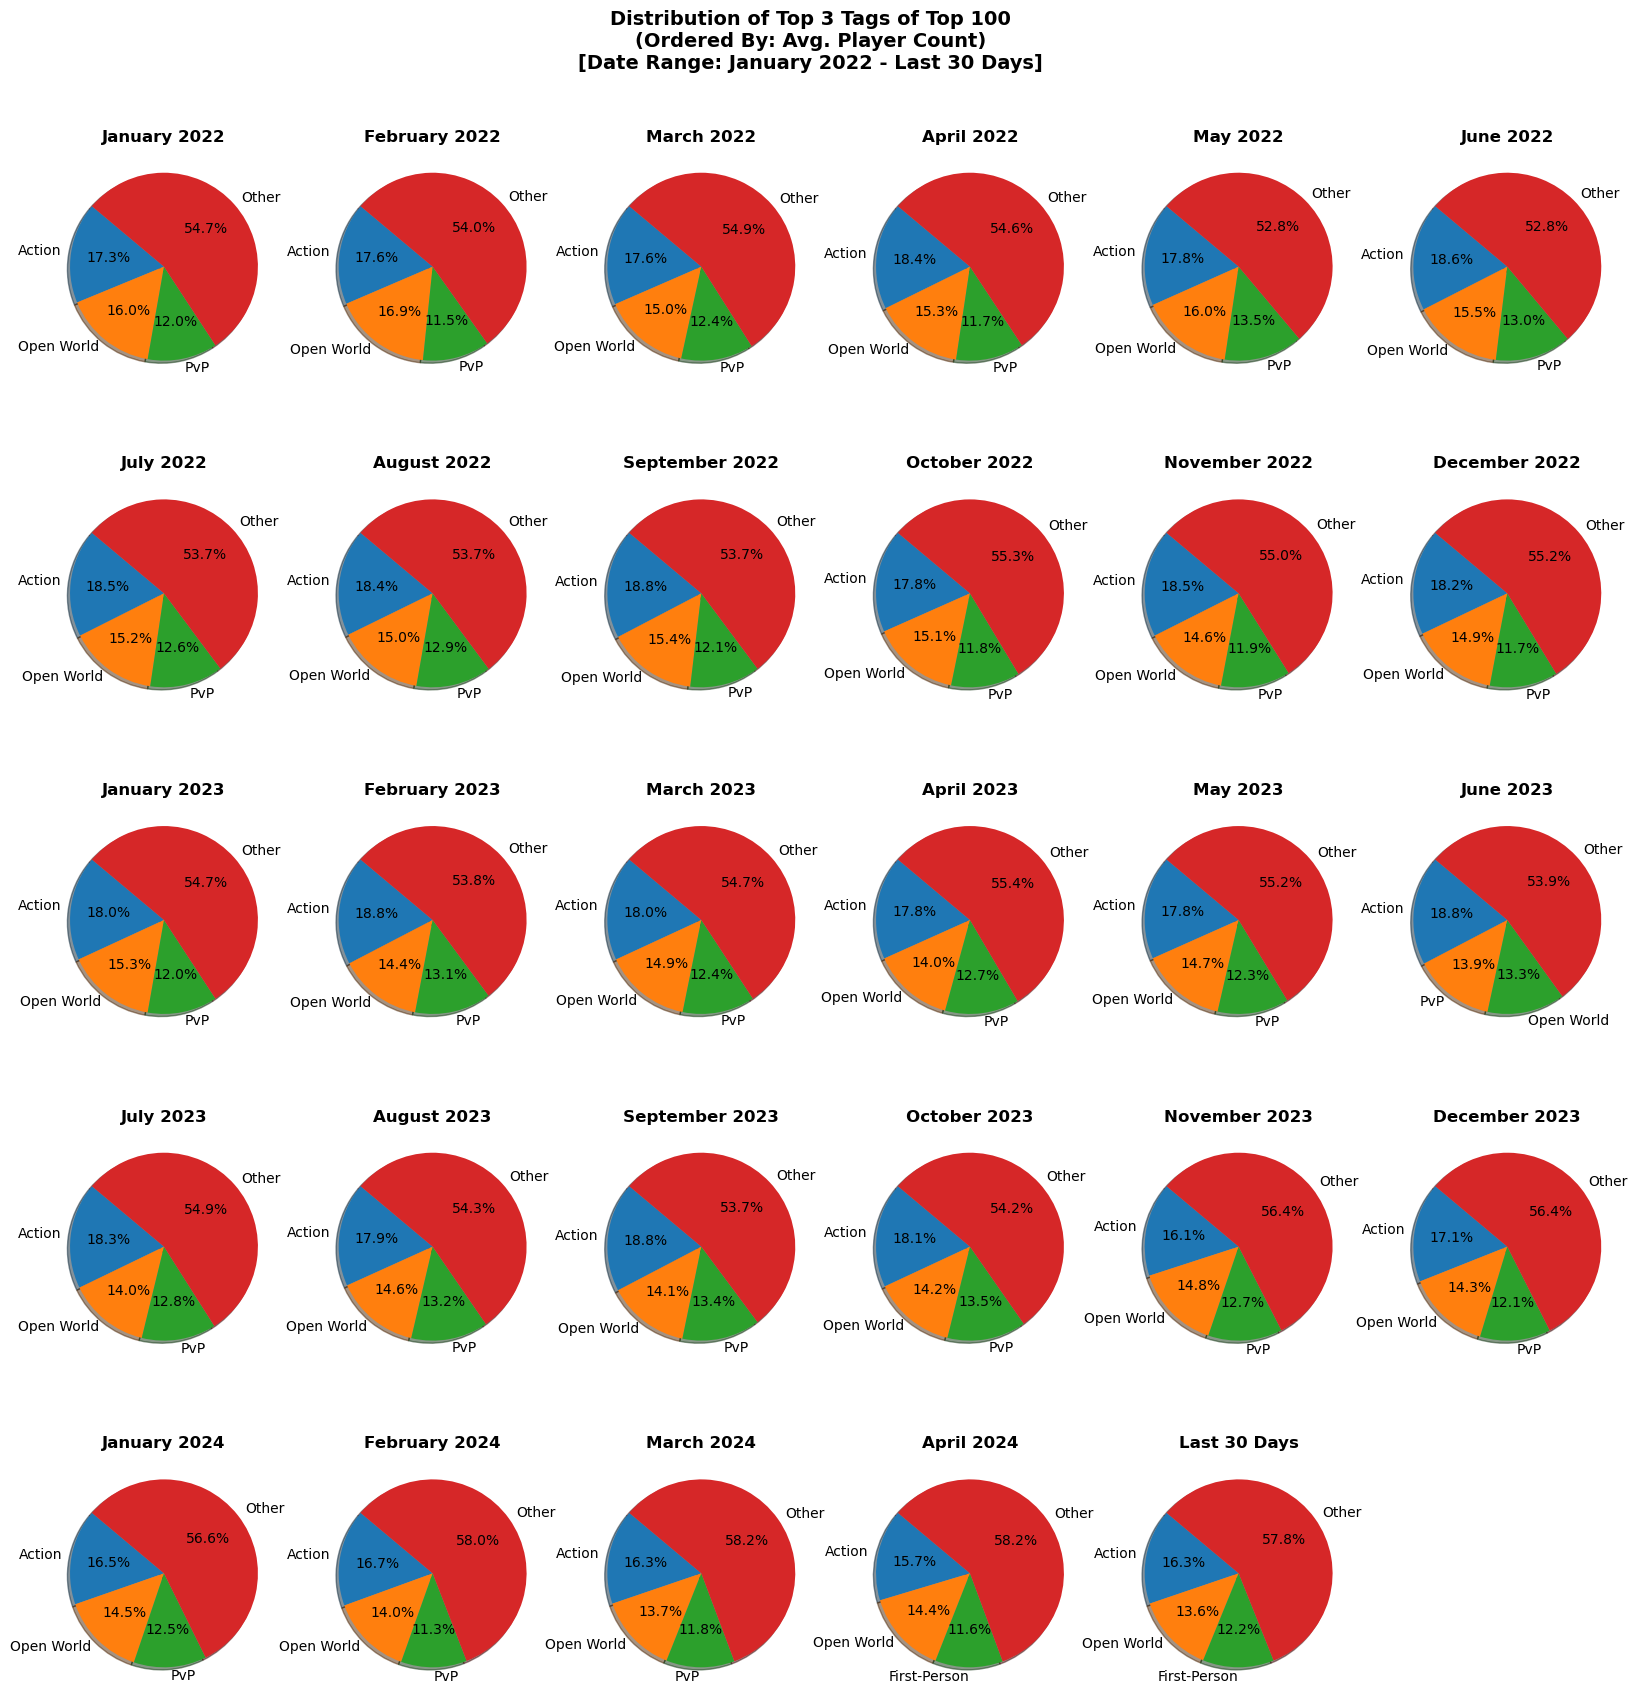

In [104]:
# Controllable Variables #
no_games = 100 # Upper limit of games to consider
tag_limit = 10 # No. considered tags
visualised_tag_count = 3 # No. tags excluded from 'Other' category
no_cols = 6 # No. columns of subplot (may require adjustment of 'wsapce' argument)
# ---------------------------- #

import math

date_counter = 0 #This is used to hide unused subplots at the bottom of this section

# Dynamic subplot configuration
no_rows = math.ceil(len(list_of_dates) / no_cols)
fig, axs = plt.subplots(no_rows, no_cols, figsize=(20,no_years*10))
plt.subplots_adjust(wspace=0.3, hspace=0.4)
plt.suptitle(f'Distribution of Top {visualised_tag_count} Tags of Top {no_games}\n(Ordered By: Avg. Player Count)\n[Date Range: {list_of_dates[0]} - {list_of_dates[len(list_of_dates)-1]}]', 
             fontsize=14,
             fontweight='bold',
             y=0.95)

# For each pie plot (for each date)
for tag_date_dict in list_of_tag_frequency_per_date:
    labels = list(tag_date_dict.keys())
    values = list(tag_date_dict.values())

    # Isolate top 3
    list_of_plot_lables = labels[0:visualised_tag_count]
    list_of_plot_values = values[0:visualised_tag_count]
    
    total_count = sum(values[:tag_limit])
    list_of_plot_values = [ round((x / total_count) * 100,2) for x in list_of_plot_values] # Get percentages

    # 'Other' category 
    list_of_plot_lables.append('Other')
    list_of_plot_values.append(100.00 - sum(list_of_plot_values)) # !Consider removing other and appending them all

    # Plot
    plt.subplot(no_rows, no_cols, date_counter + 1)
    plt.pie(list_of_plot_values, labels=list_of_plot_lables, 
            autopct='%1.1f%%',
            startangle=140, 
            shadow=True)
    plt.axis('equal')
    plt.title(f'{list_of_dates[date_counter]}', fontweight='bold')

    date_counter += 1 

# Hide unused subplots
for ax in axs.flat[date_counter:]:
    ax.axis('off')

### Chart Summary 
- The top 3 categories are very consistent 
    - No change to the ranking of the 'Action' tag
    - Appx. 3 instances of changing on the rankings across the 2nd and 3rd most popular tags
- Within the last two months, the 'First-person' category has taken third place

With the stability of the categories known, a more easily digestible plot can be made, providing a better summary of the performance of these tags over time.

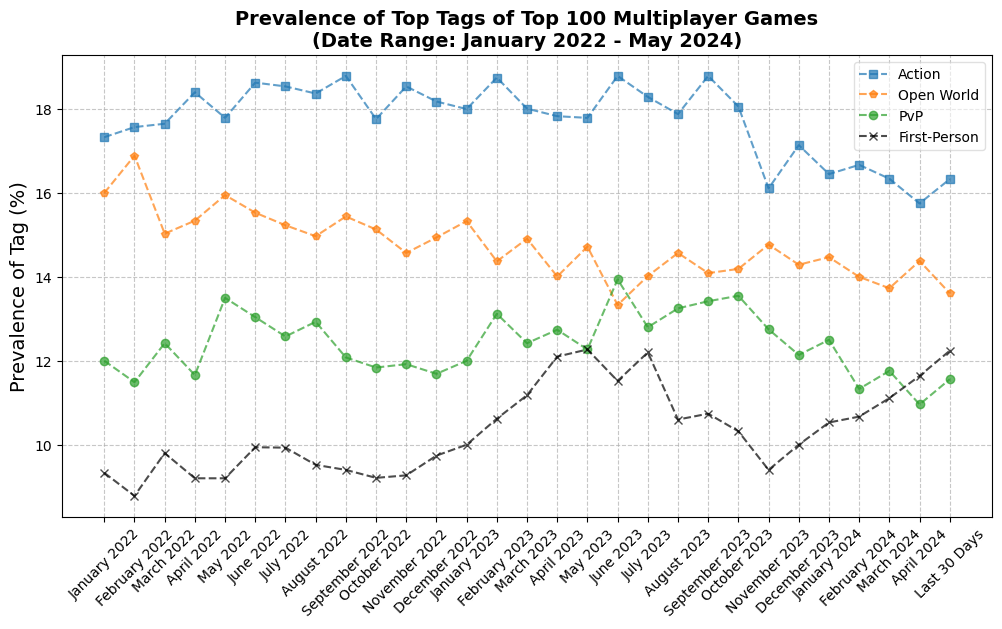

In [105]:
# Get tag frequency for each date
list_of_action_tag_percentage = []
list_of_open_world_tag_percentage = []
list_of_pvp_tag_percentage = []
list_of_first_person_tag_percentage = []

for tag_date_dict in list_of_tag_frequency_per_date:

    total_count = sum(list(tag_date_dict.values())[:tag_limit])
    list_of_action_tag_percentage.append(round((tag_date_dict.get('Action') / total_count) * 100, 2))
    list_of_open_world_tag_percentage.append(round((tag_date_dict.get('Open World') / total_count) * 100, 2))
    list_of_pvp_tag_percentage.append(round((tag_date_dict.get('PvP') / total_count) * 100, 2))
    list_of_first_person_tag_percentage.append(round((tag_date_dict.get('First-Person') / total_count) * 100, 2))

# Plot line graph
plt.figure(figsize=(12,6))

plt.plot(list_of_action_tag_percentage, 
         label='Action', 
         marker='s', 
         linestyle='--',
         alpha=0.7)
plt.plot(list_of_open_world_tag_percentage, 
         label='Open World', 
         marker='p',
         linestyle='--', 
         alpha=0.7)
plt.plot(list_of_pvp_tag_percentage, 
         label='PvP',
         marker='o', 
         linestyle='--', 
         alpha=0.7)
plt.plot(list_of_first_person_tag_percentage,
         label='First-Person', 
         marker='x',
         linestyle='--', 
         color='black', 
         alpha=0.7)

plt.grid(True, linestyle='--',alpha=0.7)

plt.xticks(range(len(list_of_dates)), list_of_dates, rotation=45)

plt.title(f'Prevalence of Top Tags of Top {no_games} Multiplayer Games\n(Date Range: {list_of_dates[0]} - {current_month} {current_year})', 
          fontsize=14,
          fontweight='bold')

plt.ylabel('Prevalence of Tag (%)', fontsize=14)

plt.legend(framealpha=0.6)
plt.show()

### Graph Summary 
This graph provides a more easily digestible visualisation of the performance of most frequent tags of multi-player games across the years.

- The action tag is consistent the most prevalent tag amongst successful multi-player games.
- The Open Worlds and PvP tags are very consistent in their rankings, with only appx. 3 instances of a change in rank